In [1]:
import os
import sys
from pathlib import Path

# patch python path with root repo directory
sys.path.append(str(Path(os.getcwd()).parent))

In [2]:
from PIL import Image
import numpy as np

from src.index.storage import VectorIndex
from src.image.storage import LocalImageStorage
from src.index.builder import FaceNetPyTorchImageVectoriser

In [3]:
storage_path = "/Users/hayden.jeune/.celebstore"
image_storage = LocalImageStorage(storage_path + "/images")
index = VectorIndex(storage_path + "/vec")
vectoriser = FaceNetPyTorchImageVectoriser()

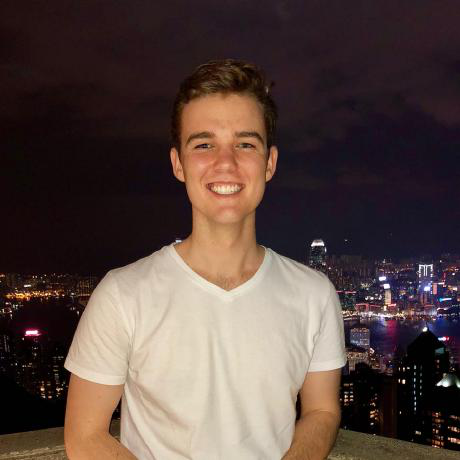

In [18]:
me = Image.open("data/github-profile.jpeg").convert("RGB")
me

In [19]:
me_vec = vectoriser.vectorise(me)

In [20]:
def similarity(a: np.ndarray, b: np.ndarray) -> float:
    # just a dot product scaled between 0 and 1 for now
    return (np.dot(a, b) + 1) / 2

In [36]:
data = index._vectors

def get_similarity(items) -> float:
    vec = items[1]
    return similarity(me_vec, vec)

similarities = sorted(data.items(), key=get_similarity, reverse=True)
name = similarities[1][0]
img = image_storage.retrieve(name)

In [37]:
turner = index.get("Sophie Turner")
hunt = index.get("Helen Hunt")
reynolds = index.get("Ryan Reynolds")
print(similarity(me_vec, turner))
print(similarity(me_vec, hunt))
print(similarity(me_vec, reynolds))

0.4961918617008042
0.5886834937988014
0.48718406903141565


You look most like Roger Federer!


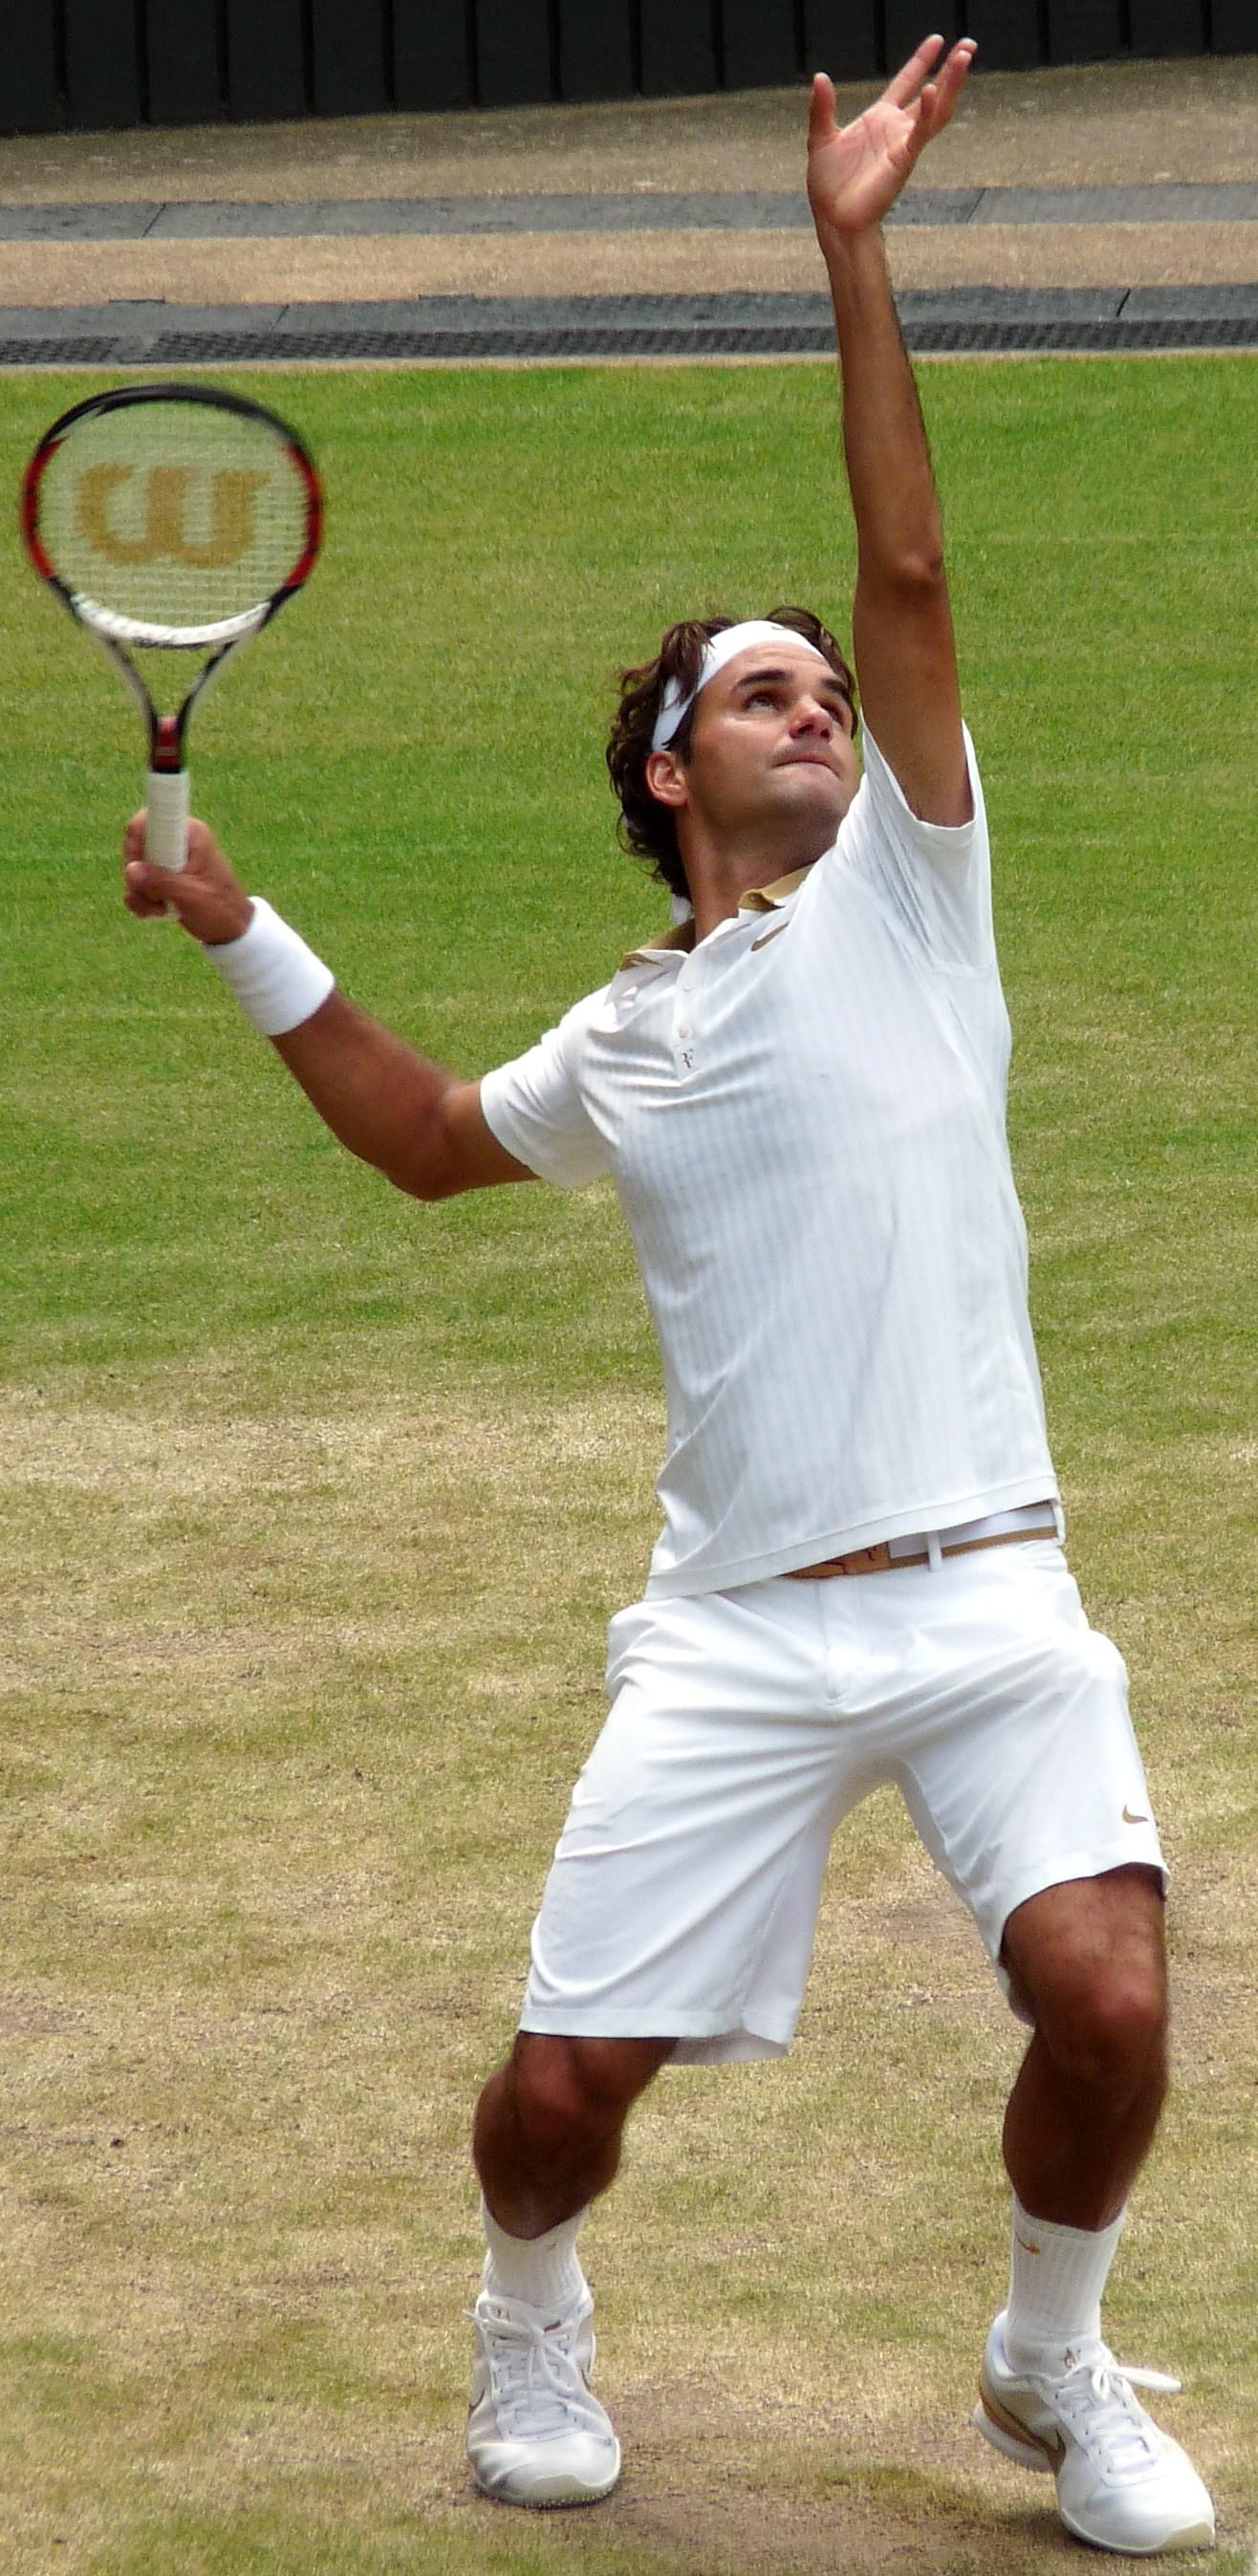

In [38]:
print(f"You look most like {name}!")
img